In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0063_5centers_1epr30fr_BALANCED_ResNet18_Median_LateralityFixThenFlipAgain')
clog_path = 'experiments/0064_5centers_1epr30fr_BALANCED_ResNet18_Median_LateralityFixThenFlipAgainClient_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'GMLD_val_loss', 'LMLD_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.509684845441431,
 0.55439004756706,
 0.5667753677949292,
 0.5993023530395556,
 0.6151975637257685,
 0.6440447499702959,
 0.6327910945125943,
 0.6338749004205253,
 0.6668109573291024,
 0.6655018583049275,
 0.6557666029926418,
 0.6841266632833113,
 0.6833395168702867,
 0.6619178935779431,
 0.7032251154800393,
 0.6905235087938677,
 0.7129524368727636,
 0.6887662068995016,
 0.7299238808194265,
 0.7287462904304294,
 0.7183800463731542,
 0.7452284738032959,
 0.7485839337238975,
 0.7434489581972463,
 0.7578976205446663,
 0.7565431419004679,
 0.7638436890676312,
 0.761456066142904,
 0.7747104915967139,
 0.7706475109501897]

In [7]:
inbreast_metrics['local_loss']

{0: [0.7838683724403381],
 1: [0.8482415080070496],
 2: [0.6719255447387695],
 3: [0.818517804145813],
 4: [0.7066904306411743],
 5: [0.8008608222007751],
 6: [0.7766181826591492],
 7: [0.6552991271018982],
 8: [0.7143763899803162],
 9: [0.7344897389411926],
 10: [0.7353109121322632],
 11: [0.7343296408653259],
 12: [0.711143970489502],
 13: [0.6974614262580872],
 14: [0.663654088973999],
 15: [0.6725465655326843],
 16: [0.6492291688919067],
 17: [0.6047528386116028],
 18: [0.6961056590080261],
 19: [0.6169705390930176],
 20: [0.5565994381904602],
 21: [0.5842819213867188],
 22: [0.6610686182975769],
 23: [0.556519627571106],
 24: [0.5957015156745911],
 25: [0.6870922446250916],
 26: [0.6836389303207397],
 27: [0.563321590423584],
 28: [0.5895123481750488],
 29: [0.557163417339325],
 30: []}

## Curve

In [8]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[0.7008830308914185,
 0.6471422910690308,
 0.6021944880485535,
 0.5355892181396484,
 0.6061893105506897,
 0.599561333656311,
 0.6805456876754761,
 0.5548065304756165,
 0.541048526763916,
 0.6143379211425781,
 0.5608407258987427,
 0.5207499265670776,
 0.5117472410202026,
 0.5210350751876831,
 0.46548205614089966,
 0.5219886302947998,
 0.5797940492630005,
 0.5493860244750977,
 0.6271899342536926,
 0.5106065273284912,
 0.5846486687660217,
 0.5087899565696716,
 0.5058611035346985,
 0.5597510933876038,
 0.6614434719085693,
 0.5298684239387512,
 0.5286508202552795,
 0.7087740898132324,
 0.5932942032814026,
 0.6039983034133911]

In [9]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

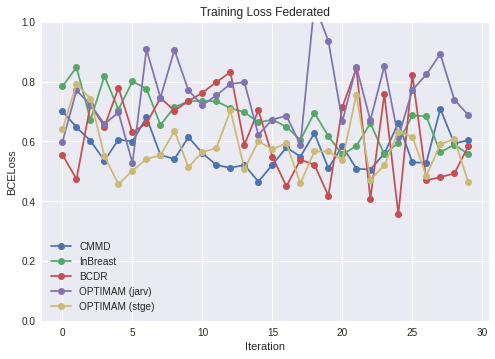

In [10]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_MEDIAN.png')

In [11]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

KeyError: 'local_val_loss'

In [ ]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

In [ ]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

In [ ]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN_Laterality.png')

In [ ]:
plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [12]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [ ]:
cmmd_f1

In [13]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]

In [23]:
all_true_positives = inbreast_metrics['GMLD_true_positives'][-1] + stge_metrics['GMLD_true_positives'][-1] + jarv_metrics['GMLD_true_positives'][-1] + bcdr_metrics['GMLD_true_positives'][-1] + cmmd_metrics['GMLD_true_positives'][-1]
all_false_positives = inbreast_metrics['GMLD_false_positives'][-1] + stge_metrics['GMLD_false_positives'][-1] + jarv_metrics['GMLD_false_positives'][-1] + bcdr_metrics['GMLD_false_positives'][-1] + cmmd_metrics['GMLD_false_positives'][-1]
all_false_negatives = inbreast_metrics['GMLD_false_negatives'][-1] + stge_metrics['GMLD_false_negatives'][-1] + jarv_metrics['GMLD_false_negatives'][-1] + bcdr_metrics['GMLD_false_negatives'][-1] + cmmd_metrics['GMLD_false_negatives'][-1]
all_f1 = 2 * all_true_positives / (2 * all_true_positives + all_false_positives + all_false_negatives)

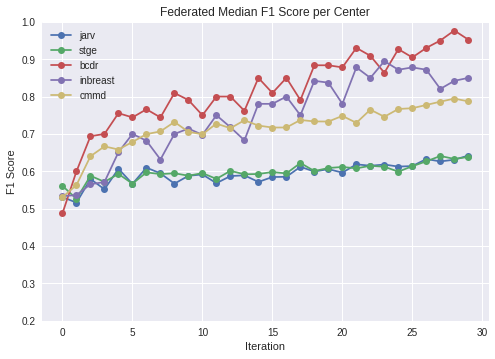

In [14]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('Federated Median F1 Score per Center')
plt.savefig('./plots/FMedian_F1_LateralityFlipAgain.png')

In [27]:
print(inbreast_f1[-1], cmmd_f1[-1], jarv_f1[-1], stge_f1[-1], bcdr_f1[-1], all_f1) 

0.85 0.7871853546910755 0.6420749279538905 0.6382783882783882 0.9523809523809523 0.6593059936908517


In [28]:
all_true_positives = inbreast_metrics['GMLD_true_positives'][-1] + bcdr_metrics['GMLD_true_positives'][-1] + cmmd_metrics['GMLD_true_positives'][-1]
all_false_positives = inbreast_metrics['GMLD_false_positives'][-1] + bcdr_metrics['GMLD_false_positives'][-1] + cmmd_metrics['GMLD_false_positives'][-1]
all_false_negatives = inbreast_metrics['GMLD_false_negatives'][-1] + bcdr_metrics['GMLD_false_negatives'][-1] + cmmd_metrics['GMLD_false_negatives'][-1]
no_optimam_f1 = 2 * all_true_positives / (2 * all_true_positives + all_false_positives + all_false_negatives)

In [29]:
no_optimam_f1

0.8053949903660886

In [ ]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]


In [17]:
cmmd_accuracy

[0.5416666666666666,
 0.5555555555555556,
 0.7129629629629629,
 0.7083333333333334,
 0.7314814814814815,
 0.7037037037037037,
 0.7916666666666666,
 0.7870370370370371,
 0.7777777777777778,
 0.7268518518518519,
 0.7314814814814815,
 0.7546296296296297,
 0.7268518518518519,
 0.7638888888888888,
 0.7407407407407407,
 0.7453703703703703,
 0.7222222222222222,
 0.7731481481481481,
 0.7453703703703703,
 0.7314814814814815,
 0.7638888888888888,
 0.75,
 0.7685185185185185,
 0.7546296296296297,
 0.7685185185185185,
 0.7546296296296297,
 0.8009259259259259,
 0.8009259259259259,
 0.8055555555555556,
 0.7962962962962963]